In [87]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(15, 8))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)


In [88]:
df = pd.read_csv('./data/scenario_1/train.csv')

df['price_diff'] = df['price'].diff()

df.dropna(inplace=True)

#### Kiểm tra đồ thị ACF và PACF phần dư của mô hình ARIMA(0,1,0) tức d=1 , p=q=0 ở mức ý nghĩa 5%
Như chúng ta đã đã có sai phân bậc một (difference level 1)  giá đóng cửa điều chỉnh của của Bitcoin cho nên nó chính là phần dư của mô hình ARIMA(0,1,0)

Text(0.5, 0.98, 'Biểu đồ  ACF và PACF của phần dư ARIMA(0,1,0)')

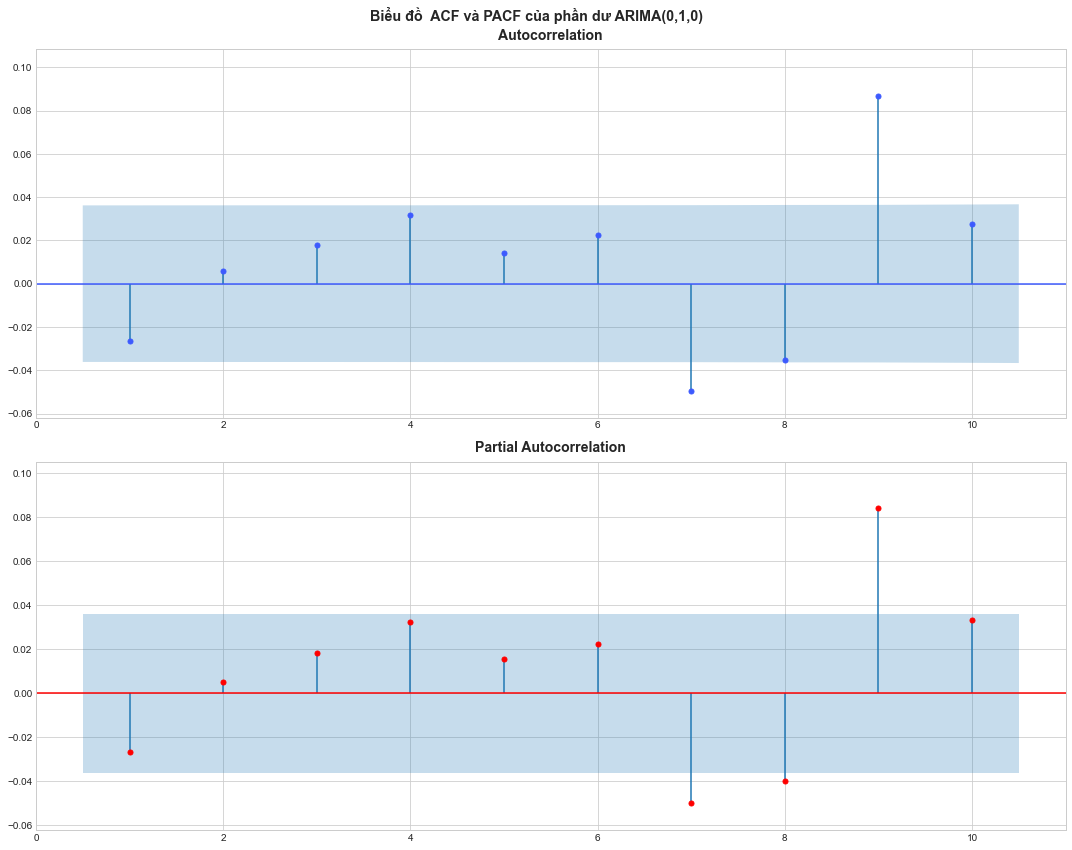

In [89]:
fig, ax = plt.subplots(2,1,figsize=(15, 12))
chart = plot_acf(df['price_diff'],lags=range(1,11),ax=ax[0],auto_ylims=True,color='#3d5afe',markerfacecoloralt='green',alpha=0.05)
chart = plot_pacf(df['price_diff'],lags=range(1,11),ax=ax[1],auto_ylims=True,color='red',alpha=0.05)
plt.suptitle("Biểu đồ  ACF và PACF của phần dư ARIMA(0,1,0)", fontsize="x-large",fontweight="bold")

In [90]:
acf, acf_ci = sm.tsa.acf(df['price_diff'],nlags=10, alpha=0.05)
pacf, pacf_ci = sm.tsa.pacf(df['price_diff'],nlags=10, alpha=0.05)

acf_ci  = acf_ci.transpose()
pacf_ci = pacf_ci.transpose()

ac_table = pd.DataFrame(data={
    'lag': range(1,11),
    'acf': acf[1:],
    'pacf': pacf[1:],
})

ac_table

,lag,acf,pacf
0,1,-0.026543,-0.026552
1,2,0.005949,0.005252
2,3,0.017885,0.018213
3,4,0.031502,0.032503
4,5,0.013977,0.015539
5,6,0.022258,0.022455
6,7,-0.049511,-0.049885
7,8,-0.035045,-0.039894
8,9,0.086670,0.084177
9,10,0.027338,0.033237


Theo kết quả của đồ thị ACF thì ta có các lag 7,9 có ý nghĩa thống kê, ngược ra ngoài 
0.035. Trong khi kết quả của biểu đồ PACF thì các lag 7,8,9 có ý nghĩa thống kê vược ra ngoài 0.035.
Từ kết quả trên nhóm chọn được các tham số p và q để xây dựng mô hình ARIMA.
Giá trị của d(difference) là một vì chuỗi dừng ở lần lấy sai phân bậc một. Từ các độ trễ của có nghĩa
thống kết của ACF và PACF ta có q=[7,9] vì ACF thể hiện tính MA của chuỗi (Moving Average) và p=[7,8,9] 
vì PACF đại điện cho tính AR (Autoregressive). Kết hợp các tham số trên chúng ta sẽ có các mô hình ARIMA như sau:
(7,1,7);(7,1,9);(8,1,7);(8,1,9);(9,1,7);(9,1,9) tổng cộng có 6 mô hình. Ta thực hiện xây dừng từng mô hình dựa dự báo trên 3
kịch bản của dữ liệu chọn mô hình nào cho MAPE bé nhất sẽ là mô hình ARIMA tốt nhất.